In [12]:
# import joblib
 #from imblearn.pipeline import Pipeline as SamplerResolvingPipeline

# model_paths  = {
#     "LR - Socio+Demo": joblib.load('nested_cv_search_rf_diff_Socio+demo.pkl'),
#     "LR- Socio+Demo+Health": joblib.load('nested_cv_search_lr_diff_Socio+demo+health.pkl'),
#     " XGB - Socio+Demo+Psy":joblib.load('nested_cv_optuna_xgb_diff_Socio+demo+psy.pkl'),
#     " SVM - Full": joblib.load('nested_cv_optuna_svm_diff_Socio+demo+psy+health.pkl'),
#     " LR - Lasso": joblib.load('nested_cv_search_lr_diff_Lasso.pkl'),
#     " XGB - RF_FeatureImportance":joblib.load('nested_cv_search_rf_diff_RFImportance.pkl')
# }


C:\Users\u1246538\AppData\Local\Temp\ipykernel_7996\616629880.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_f1, x="Model", y="F1 Macro", palette="Purples")


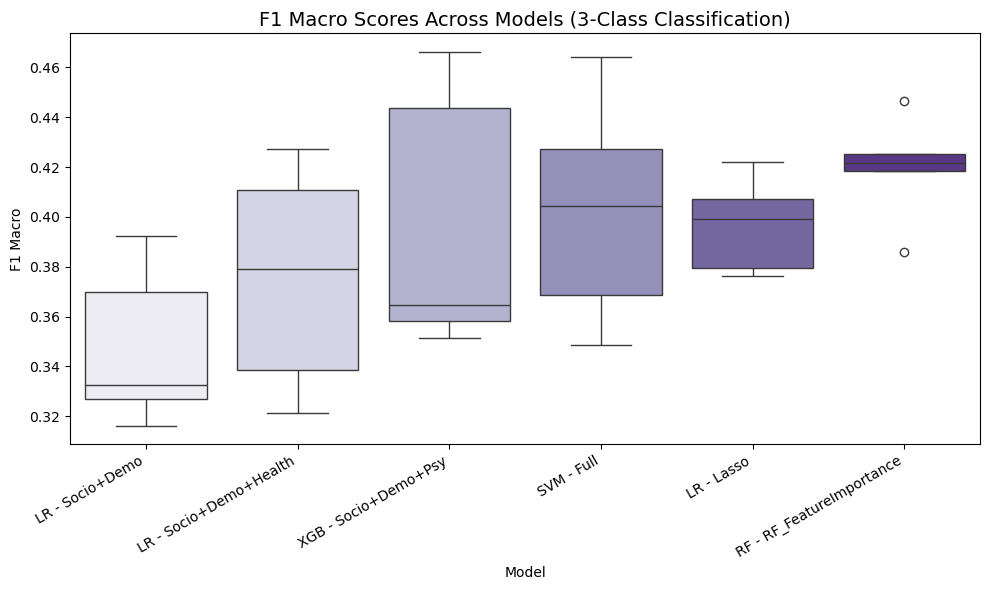

In [12]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Paths to model result files ===
model_paths = {
    "LR - Socio+Demo": 'nested_cv_search_rf_diff_Socio+demo.pkl',
    "LR - Socio+Demo+Health": 'nested_cv_search_lr_diff_Socio+demo+health.pkl',
    "XGB - Socio+Demo+Psy": 'nested_cv_optuna_xgb_diff_Socio+demo+psy.pkl',
    "SVM - Full": 'nested_cv_optuna_svm_diff_Socio+demo+psy+health.pkl',
    "LR - Lasso": 'nested_cv_search_lr_diff_Lasso.pkl',
    "RF - RF_FeatureImportance": 'nested_cv_search_rf_diff_RFImportance.pkl'
}

# === Load scores ===
f1_data = []
for model_name, file_path in model_paths.items():
    results = joblib.load(file_path)
    scores = results['test_score']  # <- because scoring='f1_macro'
    for score in scores:
        f1_data.append({
            'Model': model_name,
            'F1 Macro': score
        })

df_f1 = pd.DataFrame(f1_data)

# === Plot ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_f1, x="Model", y="F1 Macro", palette="Purples")
plt.xticks(rotation=30, ha='right')
plt.title("F1 Macro Scores Across Models (3-Class Classification)", fontsize=14)
plt.tight_layout()
plt.savefig("boxplot_f1_macro_3class_models.png", dpi=300)
plt.show()


In [16]:
from scipy.stats import ttest_rel
import joblib
import numpy as np
from imblearn.pipeline import Pipeline as SamplerResolvingPipeline
# Load nested CV results (update paths as needed)
basic_model_cv = joblib.load('nested_cv_search_lr_diff_Socio+demo.pkl')
best_model_cv = joblib.load('nested_cv_search_rf_diff_RFImportance.pkl')

basic_scores = np.array(basic_model_cv['test_score'])
best_scores = np.array(best_model_cv['test_score'])


# Sanity check: Make sure both arrays have same length
assert len(basic_scores) == len(best_scores), "Mismatch in number of folds"

# Paired t-test
t_stat, p_value = ttest_rel(best_scores, basic_scores)

# Print results
print(f"Paired t-test results comparing {metric} between models:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")


Paired t-test results comparing f1_macro between models:
t-statistic = 2.1654
p-value = 0.0963
